In [1]:
# import libraries
%matplotlib inline
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.stats
import iris

In [2]:
def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r = np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

In [3]:
atlas = pd.read_csv('data/sampleAtlas.csv') # derived  from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/
atlas = pd.read_csv('data/world_cities.csv')
atlas = atlas[atlas['pop']> 500000]
UScities = atlas[atlas['country'].str.contains('United States')]

In [83]:
# Read in NLDAS/netcdf data
filename = 'data/NLDAS/NLDAS_FORA0125_MC.ACLIM01.002.nc'
cubes = iris.load(filename)

# read in 'atlas' data 
atlas = pd.read_csv('data/sampleAtlas.csv') # derived  from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/
atlas = pd.read_csv('data/world_cities.csv')
atlas = atlas[atlas['pop']> 500000]
selected_atlas = atlas[atlas['country'].str.contains('United States')]
# build array of desired locations
sample_points = [('latitude', selected_atlas['lat'].values), ('longitude', selected_atlas['lng'].values)]

# preallocate data
outData = np.zeros([selected_atlas.shape[0], len(cubes)])
i = 0
for cube in cubes: 
    extracted = cube.interpolate(sample_points, iris.analysis.Nearest())
    outData = extracted.data # might need to be np.diag here?  not sure why not..
    outData[outData >= 1e20] = np.nan
    selected_atlas[cube.long_name] = np.diag(outData)

    i = i+1

results_atlas = selected_atlas.set_index(selected_atlas['city'])

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
print(cube.long_name)

Convective precipitation monthly total


In [101]:
print(cube.name())

Convective precipitation monthly total


In [73]:
# import UHI(JJA), slope(JJA), slope(heatwave)
filepath = 'plots/version1/'
JJAdf = pd.read_csv('US_results_cleaned_data.csv')
HWdf = pd.read_csv('plots/version1/USHWresults_concatenated.csv')

In [74]:
UHI_JJA = JJAdf.set_index(JJAdf['City'])['Mean UHI'].loc[HWdf.City]
slopes_JJA = JJAdf.set_index(JJAdf['City'])['Slope'].loc[HWdf.City]
slopes_hw = HWdf['Slope']

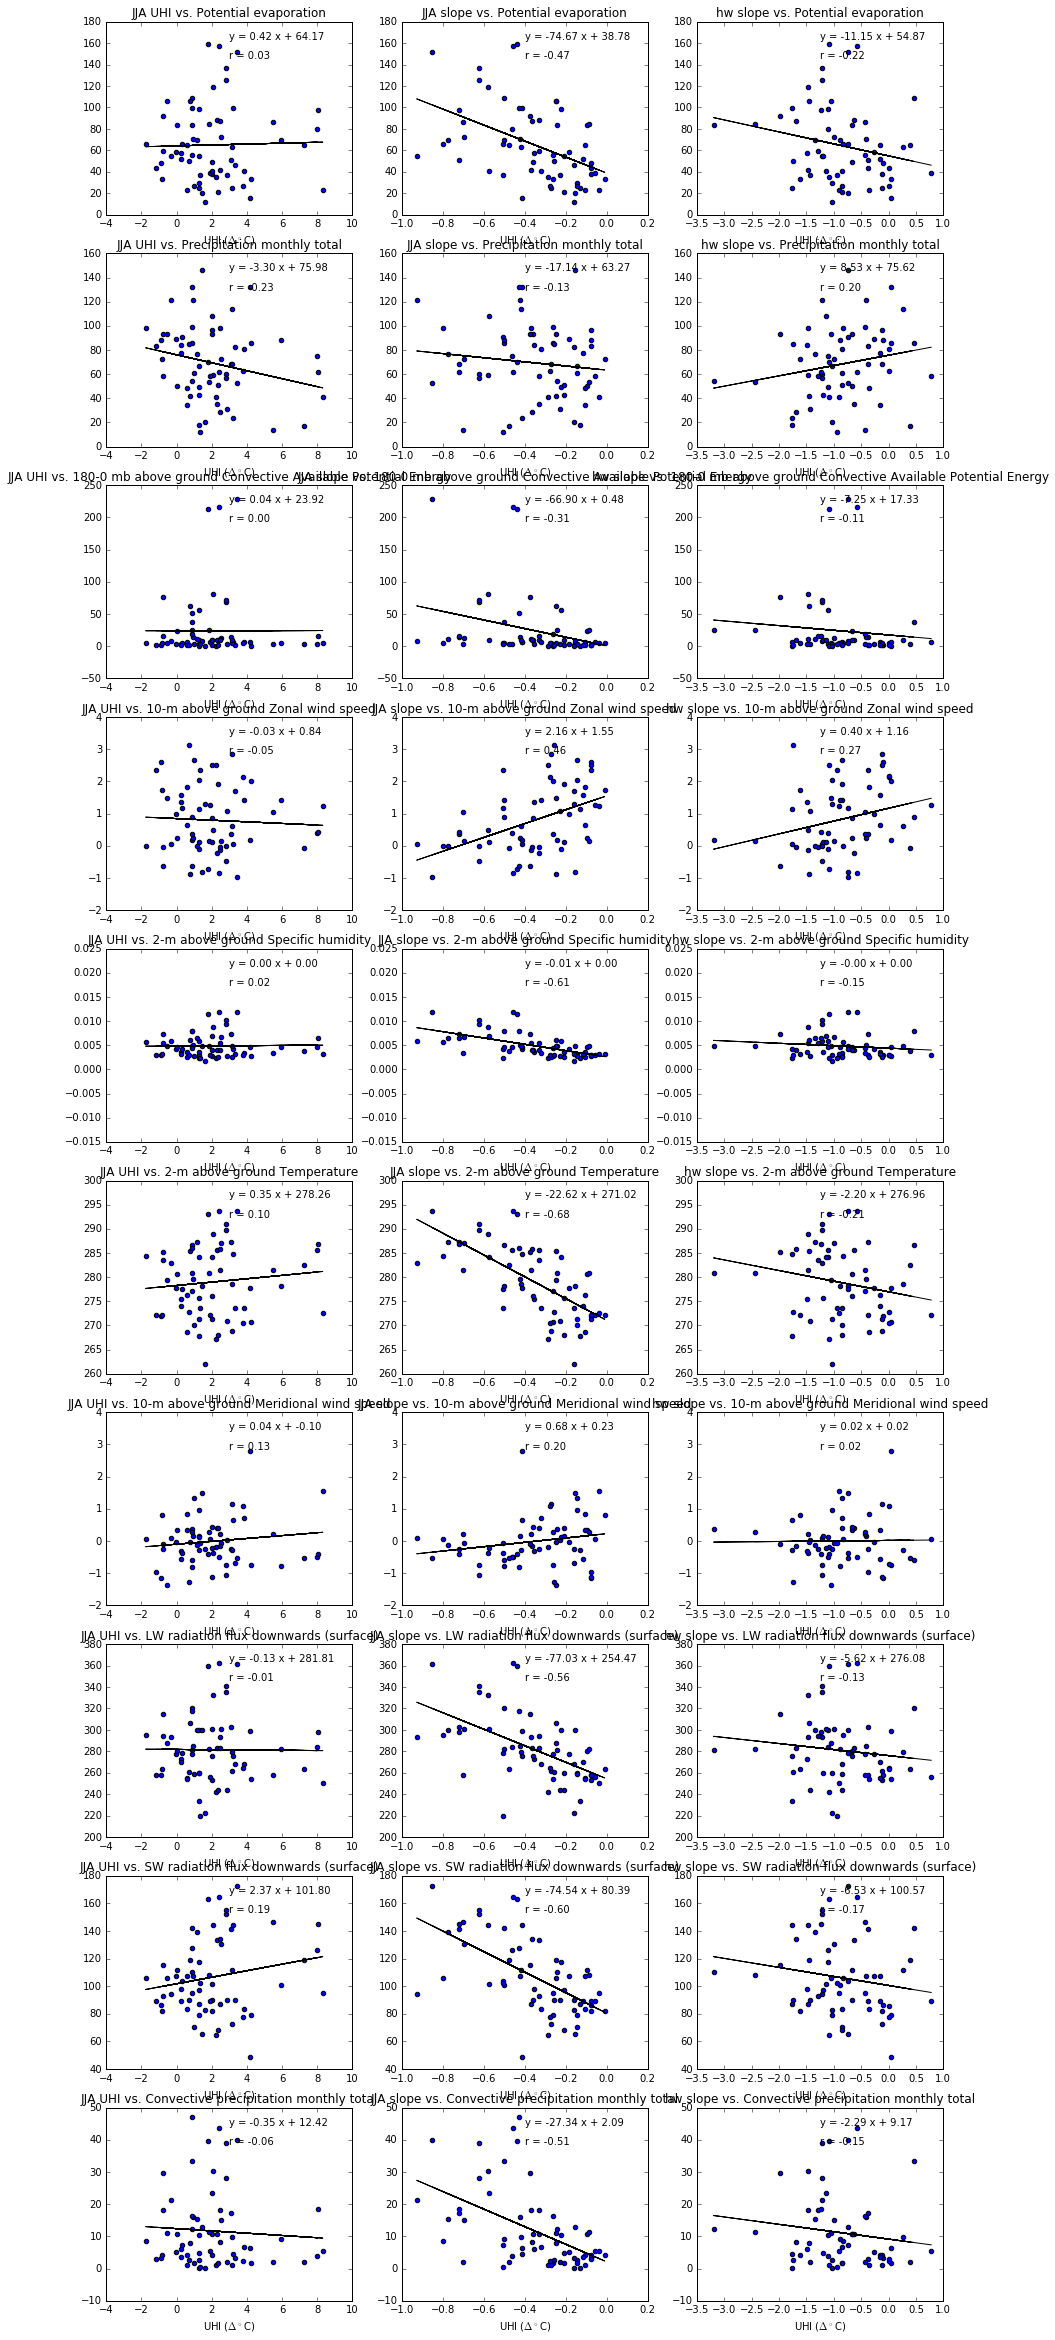

In [90]:
results_atlas = selected_atlas.set_index(selected_atlas['city'])
results_atlas = results_atlas.loc[HWdf.City]
                             
plt.figure(figsize=[15,45]) 
i = 1
for variable in selected_atlas.columns[-10:]: #['Surface pressure'] :
    column = results_atlas[variable]
    ylabel = ' '
    try: 
        plt.subplot(len(cubes), 3,i)
        easy_scatter(UHI_JJA,column,'JJA UHI vs. %s'%variable, 'UHI ($\Delta ^\circ$C)', ylabel)

        plt.subplot(len(cubes), 3,i+1)
        easy_scatter(slopes_JJA,column,'JJA slope vs. %s'%variable, 'UHI ($\Delta ^\circ$C)', ylabel)

        plt.subplot(len(cubes), 3,i+2)
        easy_scatter(slopes_hw.values,column.values,'hw slope vs. %s'%variable, 'UHI ($\Delta ^\circ$C)', ylabel)
    except ValueError : 
        print 'error'
    i = i+3

In [87]:
x = slopes_hw

0    -0.632372
1    -3.198411
2    -0.997274
3    -0.096482
4    -0.580262
5    -0.372786
6     0.035999
7    -0.124869
8    -0.418948
9    -1.217737
10   -1.051088
11   -1.219730
12   -1.090123
13   -0.850870
14   -0.267002
15   -1.031524
16   -1.106331
17   -0.382376
18         NaN
19   -1.770196
20   -1.280202
21   -1.435532
22   -1.198283
23   -0.675841
24   -1.104766
25   -0.430271
26   -1.479369
27    0.456749
28         NaN
29   -1.487305
        ...   
38   -1.458987
39   -0.735383
40   -0.851207
41   -1.616834
42   -0.667855
43   -0.434487
44   -0.889142
45   -1.091572
46   -0.123590
47    0.000000
48   -1.028631
49   -0.889578
50    0.039551
51   -1.696055
52   -1.225879
53    0.778788
54         NaN
55   -2.438476
56   -1.217737
57    0.000000
58   -0.352584
59   -1.144741
60   -0.934090
61   -1.981506
62   -0.742292
63    0.263897
64   -0.846281
65   -1.347478
66   -0.147843
67   -1.748064
Name: Slope, dtype: float64